In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./csvs/Mall_Customers.csv")
df.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
97,98,Female,27,60,50
63,64,Female,54,47,59
182,183,Male,46,98,15
41,42,Male,24,38,92
138,139,Male,19,74,10


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
df = df.drop("CustomerID",axis=1)

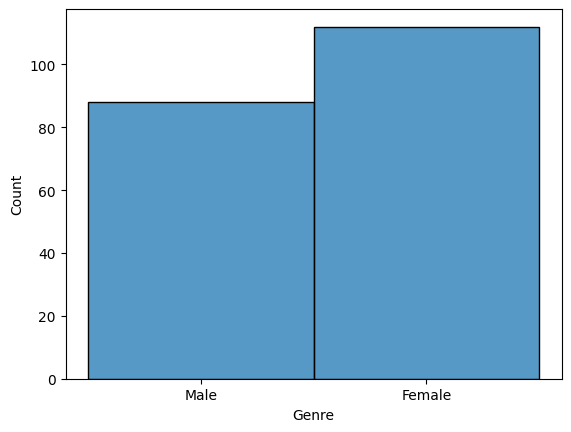

In [7]:
sns.histplot(df.Genre)
plt.show()

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


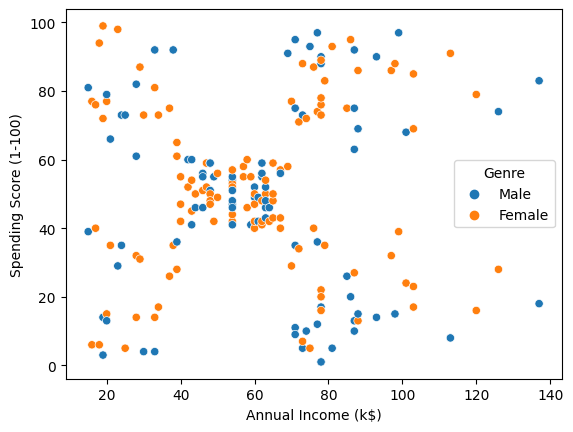

In [8]:
sns.scatterplot(df["Annual Income (k$)"] , df["Spending Score (1-100)"] , hue=df.Genre)
plt.show()


<AxesSubplot:>

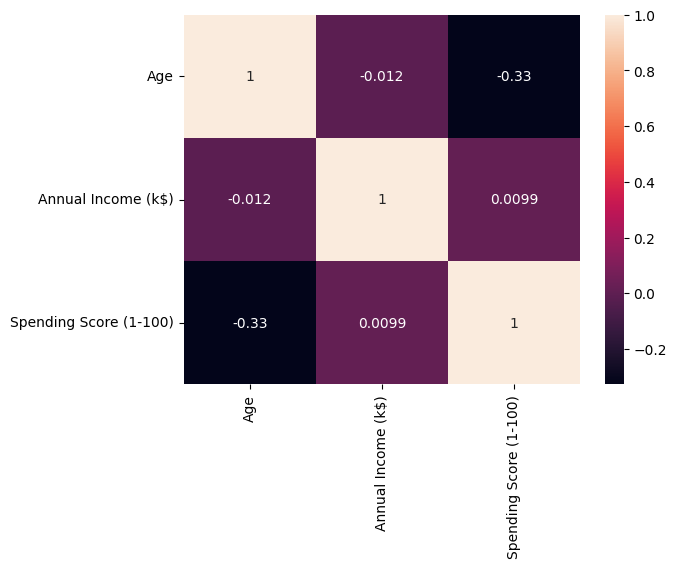

In [9]:
sns.heatmap(df.corr() , annot=True)

In [12]:
df["Genre"] = df["Genre"].replace(
    {
        "Male" : 0,
        "Female" : 1
    }
)

In [14]:
df.sample(5)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
177,0,27,88,69
197,0,32,126,74
70,0,70,49,55
123,0,39,69,91
167,1,33,86,95


In [27]:
from sklearn.cluster import KMeans
no_of_clusters = range(1 , 10)
inertia = []
for i in no_of_clusters:
    model = KMeans(n_clusters=i)
    model.fit(df)
    inertia.append(model.inertia_)    

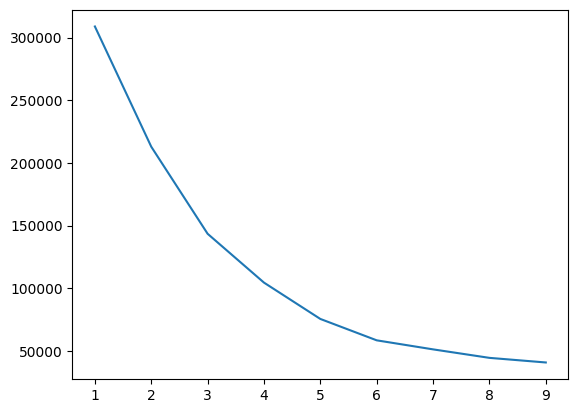

In [28]:
plt.plot(no_of_clusters , inertia)

In [41]:
model = KMeans(n_clusters=5)
model.fit(df)

KMeans(n_clusters=5)

In [42]:
labels = model.labels_

c:\Users\kulde\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Customer Segmentation')

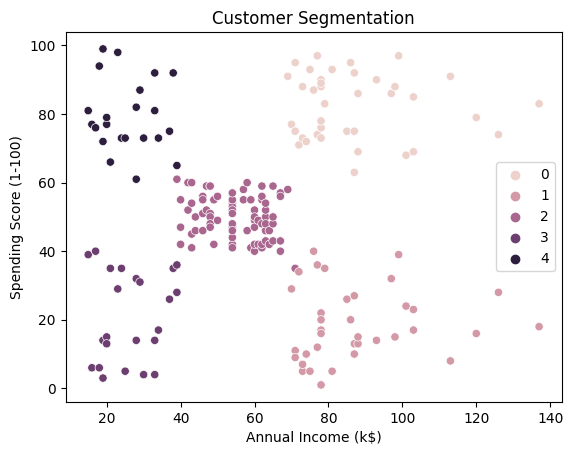

In [44]:
sns.scatterplot(df["Annual Income (k$)"] , df["Spending Score (1-100)"] , hue=labels)
plt.title("Customer Segmentation")

In [47]:
import pickle
with open("./model.pickle" , "wb") as f:
    pickle.dump(model , f)